In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from scipy import stats
import pickle
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('seaborn')

In [2]:
# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
background_dict = pickle.load(infile)

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
signal_dict = pickle.load(infile)

# list all keys of the files
keys = background_dict.keys()

### Mass

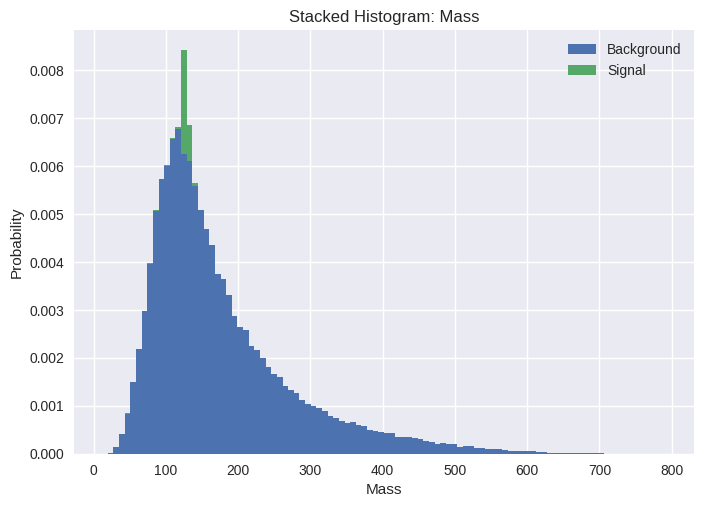

In [3]:
fig, ax = plt.subplots(1,1)

bkg_mass = background_dict['mass']
sig_mass = signal_dict['mass']

data = [bkg_mass, sig_mass]

bkg_weight = np.array([2000]*len(bkg_mass))
sig_weight = np.array([50]*len(sig_mass))

a = ax.hist(data, bins=100, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])

ax.set_xlabel("Mass")
ax.set_ylabel("Probability")
ax.set_title("Stacked Histogram: Mass")

plt.legend(loc=0)
plt.show()

In [4]:
expected_sig = stats.poisson.cdf(2050, 2000, loc=0)
expected_sig

0.8703871254450806

In [5]:
n_higgs = 50
n_qcd = 2000

sig = n_higgs / np.sqrt(n_qcd)
sig

1.118033988749895

In [6]:
bins = 100
bkd_hist = ax.hist(bkg_mass, bins, range=[0,round(a[1][-1])], weights=bkg_weight / 100000)
sig_hist = ax.hist(sig_mass, bins, range=[0,round(a[1][-1])], weights=sig_weight / 100000)

In [7]:
expected_sig = []
for i in range(bins):
    qcd = bkd_hist[0][i] 
    higgs = sig_hist[0][i] 
    prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
    expected_sig.append(stats.norm.ppf(prob, loc=0, scale=1))

expected_sig = np.array(expected_sig)
expected_sig[np.isinf(expected_sig)] = 0

expected_sig

array([ 0.00000000e+00,  2.05786959e+00,  1.30961780e+00,  6.07986479e-01,
        1.28652803e-01, -9.30195439e-02,  1.38658957e-01,  1.15921413e-01,
        1.02737055e-01,  1.92176436e-02,  2.36622805e-02,  2.62519661e-02,
        5.16588312e-02,  4.96360886e-02,  1.10338570e-01,  2.13379193e+00,
        2.31695719e+00,  2.87828124e-01,  2.48370862e-02, -1.27480408e-02,
        1.73761470e-02, -1.16576550e-02,  1.38666189e-02,  5.02426196e-02,
        6.82552653e-03, -3.82189168e-02, -2.36675631e-02,  3.05736376e-02,
       -3.27046446e-02,  1.01889019e-01,  5.66742600e-02,  1.20310323e-01,
        1.06850287e-01, -1.52220418e-02,  1.45519706e-02,  4.58860581e-02,
        8.58042352e-02,  2.15930696e-02,  7.10367171e-02,  8.87179433e-02,
        1.78207473e-02, -4.81498702e-02,  1.74092244e-01,  1.93916112e-01,
        1.84098761e-01, -5.84280018e-02,  3.51969103e-02,  1.27099915e-01,
       -1.83526385e-02,  3.24729474e-02,  8.39313601e-02, -1.11303015e-01,
       -1.17887288e-02,  

In [8]:
index = np.where(expected_sig == np.max(expected_sig))[0][0]
bkd_hist[1][index]

126.72

In [9]:
expected_sig[index]

2.3169571858644566

### Other Features

Plots plots plots

In [10]:
keys

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

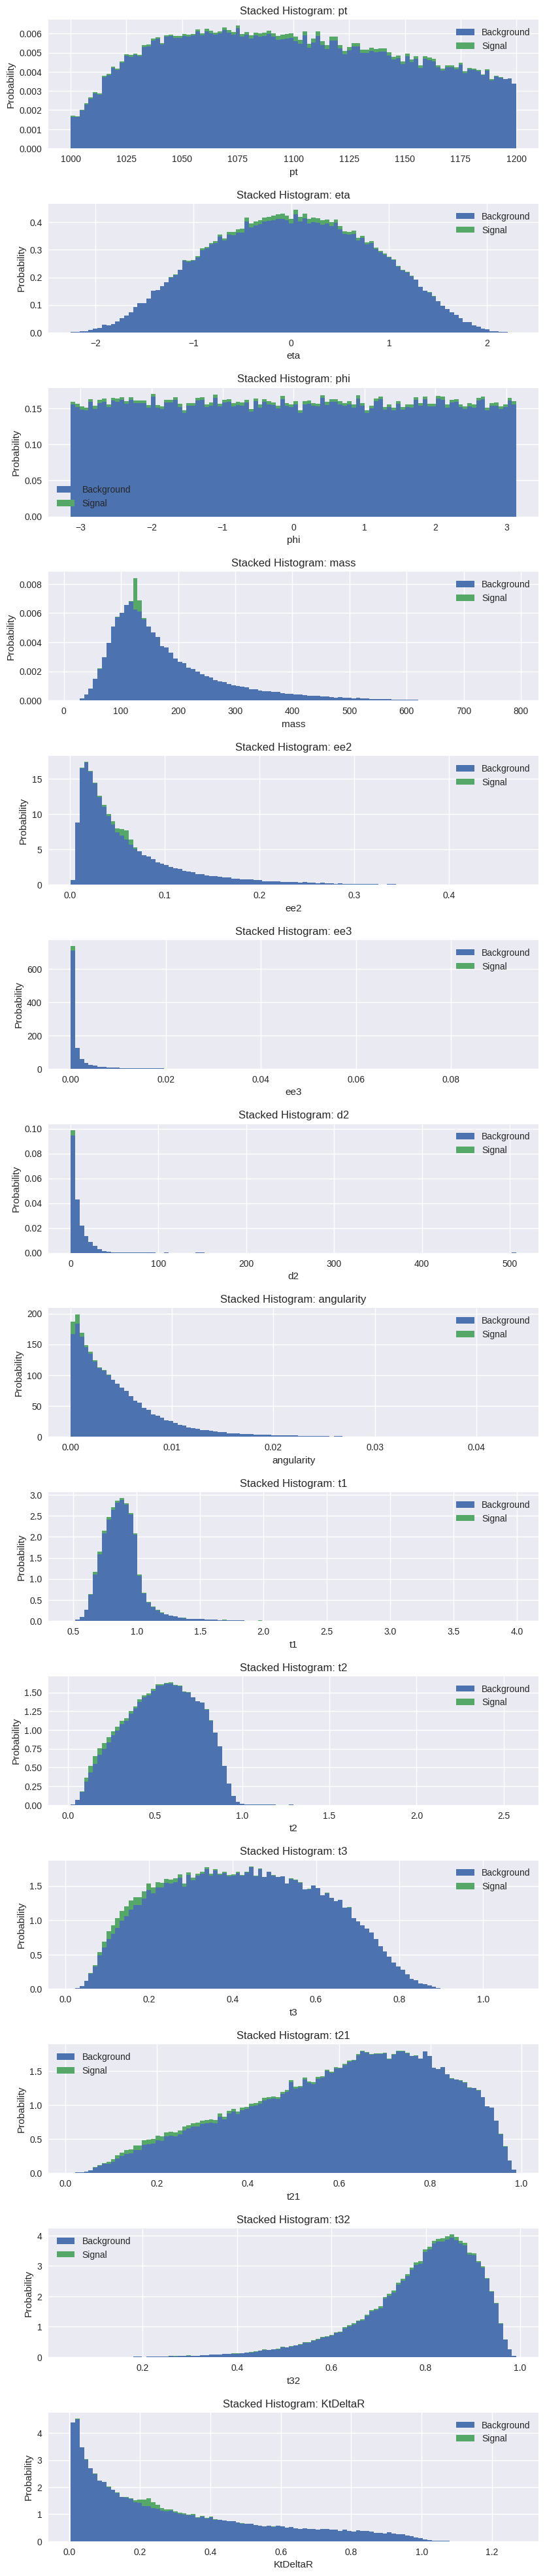

In [11]:
fig, ax = plt.subplots(len(keys), 1, figsize=(9,40))
fig.tight_layout(pad=4)

for i in range(len(keys)):

    bkg_i = background_dict[keys[i]]
    sig_i = signal_dict[keys[i]]

    data = [bkg_i, sig_i]
    
    bkg_weight = np.array([2000]*len(bkg_i))
    sig_weight = np.array([50]*len(sig_i))

    a = ax[i].hist(data, bins=100, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])

    ax[i].set_xlabel(keys[i])
    ax[i].set_ylabel("Probability")
    ax[i].set_title("Stacked Histogram: "+str(keys[i]))

    ax[i].legend(loc=0)
plt.show()

In [12]:
bins = 100
expected_sig_array = np.zeros([len(keys), bins])
max_index = np.zeros(len(keys))
bkg_hist = np.zeros([len(keys), bins])

for i in range(len(keys)):
    bkg_i = background_dict[keys[i]]
    sig_i = signal_dict[keys[i]]

    data = [bkg_i, sig_i]
    a = plt.hist(data, bins=100, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])
    
    bkg_hist_i = plt.hist(bkg_i, bins, range=[0,round(a[1][-1])], weights=bkg_weight / 100000)
    sig_hist_i = plt.hist(sig_i, bins, range=[0,round(a[1][-1])], weights=sig_weight / 100000)
    
    for j in range(bins):
        qcd = bkg_hist_i[0][j]
        higgs = sig_hist_i[0][j]
        prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
        expected_sig = stats.norm.ppf(prob, loc=0, scale=1)
        expected_sig_array[i][j] = expected_sig
        
        expected_sig_array[np.isinf(expected_sig_array)] = 0
        
    max_index = np.where(expected_sig_array[i] == np.max(expected_sig_array[i]))[0][0]
        
    print(str(keys[i])+": Highest sig "+str(round(expected_sig_array[i][max_index],2))+
          ", Location "+str(round(bkg_hist_i[1][max_index],2))+", Index "+str(max_index))
    
    plt.close()

pt: Highest sig 0.48, Location 1104.0, Index 92
eta: Highest sig 0.5, Location 1.88, Index 94
phi: Highest sig 0.3, Location 0.99, Index 33
mass: Highest sig 2.32, Location 126.72, Index 16
ee2: Highest sig 2.06, Location 0.47, Index 97
ee3: Highest sig 2.06, Location 0.08, Index 58
d2: Highest sig 2.06, Location 86.36, Index 17
angularity: Highest sig 1.43, Location 0.04, Index 54
t1: Highest sig 2.06, Location 0.44, Index 11
t2: Highest sig 2.06, Location 1.35, Index 45
t3: Highest sig 2.06, Location 0.93, Index 93
t21: Highest sig 1.43, Location 0.01, Index 1
t32: Highest sig 2.06, Location 0.04, Index 4
KtDeltaR: Highest sig 1.13, Location 0.22, Index 22


The highest signficiance was mass with a value of 2.32. Didn't tell me much about where to look, and none of the significances were particularly high.

Varying the bin size

In [13]:
n_higgs = 50
n_qcd = 2000

qcd = background_dict
higgs = signal_dict

fig, ax = plt.subplots(1,1)

j = 0
optimal_bin_num = []
for key in qcd:
    print(key + ":")
    n_higgs = 50
    n_qcd = 2000
    qcd_weight = np.array([n_qcd] * len(qcd[key]))
    higgs_weight = np.array([n_higgs] * len(higgs[key]))

    # For cuts
    max_array = []
    for bin_num in range(1, 101, 1):

        lower_val = qcd[key].min()
        upper_val = qcd[key].max()

        hist_qcd = ax.hist(qcd[key], bins = bin_num, density = False, weights = [qcd_weight / 100000], range = (lower_val, upper_val))
        hist_higgs = ax.hist(higgs[key], bins = bin_num, density = False, weights = [higgs_weight / 100000], range = (lower_val, upper_val))

        cut_sigs = []
        for i in range(bin_num):
            n_qcd = hist_qcd[0][i]
            n_higgs = hist_higgs[0][i]
            sig = stats.norm.ppf(stats.poisson.cdf(n_higgs + n_qcd, n_qcd, loc = 0))
            cut_sigs.append(sig)
        
        cut_sigs = np.array(cut_sigs)
        cut_sigs[np.isinf(cut_sigs)] = 0
        
        index_max = np.argmax(cut_sigs)
        max_array.append([bin_num, cut_sigs[index_max], index_max])

    max_sig = max_array[0][1]
    ind = 0
    for k in range(len(max_array)):
        if abs(max_array[k][1]) > abs(max_sig):
            max_sig = max_array[k][1]
            ind = k

    optimal_bin_num.append(max_array[ind][0])
    bottom_val = lower_val + max_array[ind][2] * ((upper_val - lower_val) / max_array[ind][0])
    top_val = bottom_val + ((upper_val - lower_val) / max_array[ind][0])
    
    if max_array[ind][0] == 1:
        print("No optimal cut. Expected significance over full range is " + str(max_array[ind][1]) + ".")
    else:    
        print("The optimal cut is between " + str(round(bottom_val,3)) + " and " + str(round(top_val,3))
              + " with an expected significance of " + str(round(max_array[ind][1],3)) + ".")
    print("Optimal number of bins: "+str(max_array[ind][0])+", Index: "+str(max_array[ind][2]))
    print(" --------------------- ")

    j = j + 1
    
plt.close()

pt:
No optimal cut. Expected significance over full range is 1.1060461130668817.
Optimal number of bins: 1, Index: 0
 --------------------- 
eta:
The optimal cut is between 2.185 and 2.243 with an expected significance of 2.058.
Optimal number of bins: 79, Index: 77
 --------------------- 
phi:
No optimal cut. Expected significance over full range is 1.1060461130668817.
Optimal number of bins: 1, Index: 0
 --------------------- 
mass:
The optimal cut is between 124.558 and 132.598 with an expected significance of 3.897.
Optimal number of bins: 97, Index: 14
 --------------------- 
ee2:
The optimal cut is between 0.049 and 0.066 with an expected significance of 2.108.
Optimal number of bins: 29, Index: 3
 --------------------- 
ee3:
The optimal cut is between 0.083 and 0.094 with an expected significance of 2.058.
Optimal number of bins: 9, Index: 8
 --------------------- 
d2:
The optimal cut is between 253.83 and 507.574 with an expected significance of 2.058.
Optimal number of bins: 2

### Other features w Mass Cut

pt: expected sig 7.526
from 1191.997 to 1193.997
--------
eta: expected sig 8.21
from -1.298 to -1.252
--------
phi: expected sig 0.0
from -3.142 to -3.079
--------
mass: expected sig 0.0
from 11.984 to 19.784
--------
ee2: expected sig 4.136
from 0.02 to 0.024
--------
ee3: expected sig 0.0
from 0.0 to 0.001
--------
d2: expected sig 1.793
from 10.236 to 15.311
--------
angularity: expected sig 6.819
from 0.004 to 0.005
--------
t1: expected sig 6.715
from 0.549 to 0.584
--------
t2: expected sig 7.009
from 0.681 to 0.706
--------
t3: expected sig 7.973
from 0.439 to 0.45
--------
t21: expected sig 6.991
from 0.686 to 0.696
--------
t32: expected sig 8.21
from 0.954 to 0.964
--------
KtDeltaR: expected sig 7.775
from 0.117 to 0.13
--------


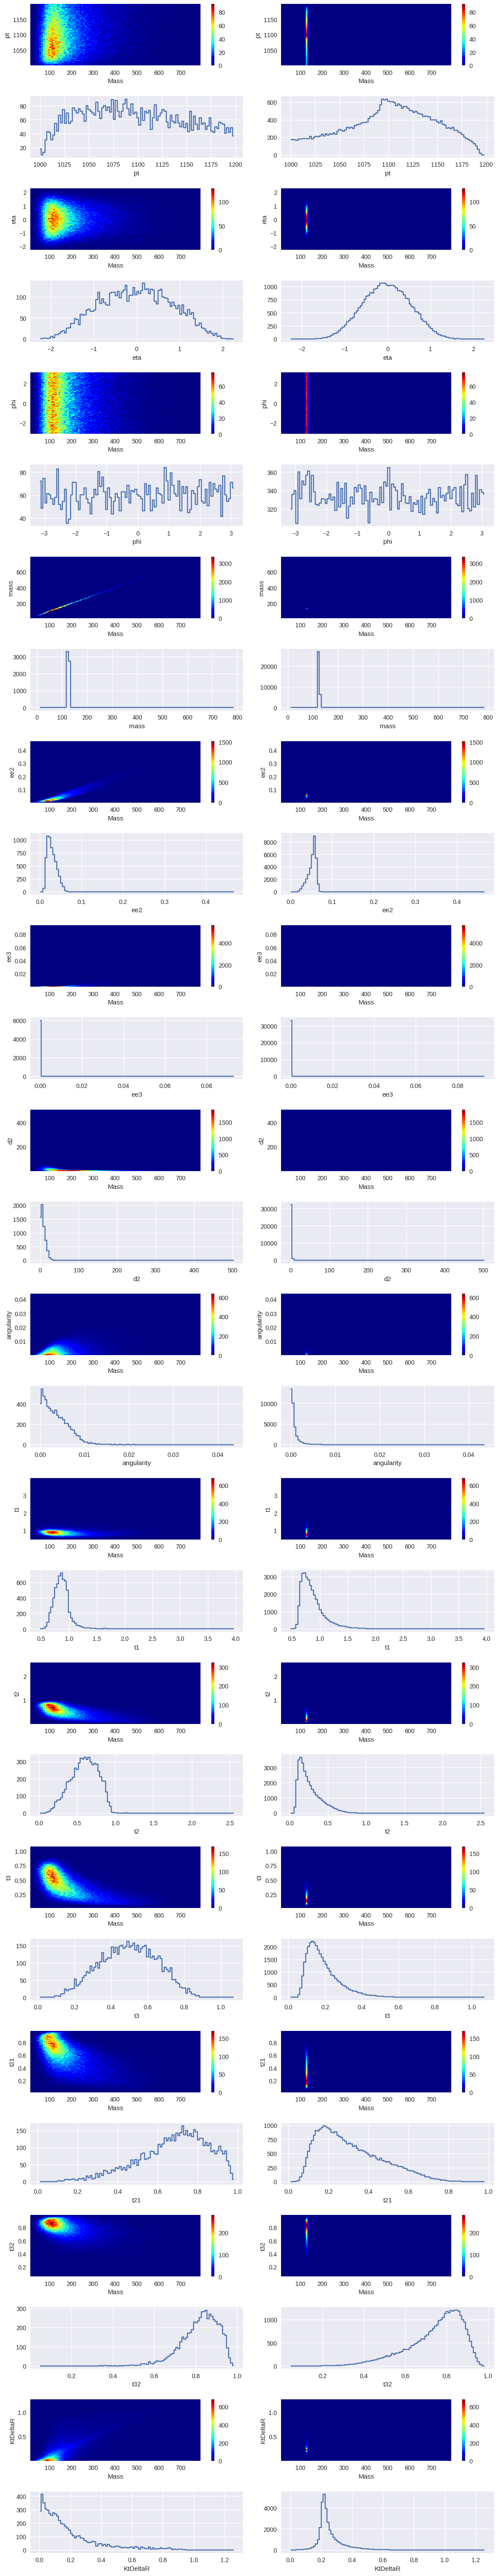

In [14]:
fig, ax = plt.subplots(len(keys)*2, 2, figsize=(12, 60))
fig.tight_layout(pad=3)

j = 0
k = 1
for key in keys:
    y_var = key

    index = 14
    optimal_bins = 97

    x_low = background_dict['mass'].min()
    x_high = background_dict['mass'].max()

    y_low = background_dict[y_var].min()
    y_high = background_dict[y_var].max()

    b = ax[j,0].hist2d(background_dict['mass'], background_dict[y_var], bins=(optimal_bins, 100), cmap=plt.cm.jet, range=([x_low, x_high], [y_low, y_high]))
    plt.colorbar(b[3], ax=ax[j,0])

    c = ax[j,1].hist2d(signal_dict['mass'], signal_dict[y_var], bins=(optimal_bins, 100), cmap=plt.cm.jet, range=([x_low, x_high], [y_low, y_high]))
    plt.colorbar(b[3], ax=ax[j,1])

    qcd_weight = (2000/2050) * (100000 / np.sum(c[0]))
    higgs_weight = (50/2050) * (100000 / np.sum(b[0]))

    ax[j,0].set_xlabel("Mass")
    ax[j,0].set_ylabel(y_var)

    ax[j,1].set_xlabel("Mass")
    ax[j,1].set_ylabel(y_var)

    bkg_slice = b[0][index]
    higgs_slice = c[0][index]

    bkg_weight = (2000/2050) * (100000 / np.sum(higgs_slice))
    bkg_slice = bkg_slice*bkg_weight
    x = np.linspace(b[2][0], b[2][-2], 100)
    ax[k,0].step(x, bkg_slice, where='mid')
    ax[k,0].set_xlabel(y_var)

    higgs_weight = (50/2050) * (100000 / np.sum(bkg_slice))
    higgs_slice = higgs_slice * higgs_weight
    x = np.linspace(c[2][0], c[2][-2], 100)
    ax[k,1].step(x, higgs_slice, where='mid')
    ax[k,1].set_xlabel(y_var)
    
    j = j+2
    k = k+2

    expected_sig = []
    for i in range(len(bkg_slice)):
        qcd = bkg_slice[i] 
        higgs = higgs_slice[i] 
        prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
        expected_sig.append(stats.norm.ppf(prob, loc=0, scale=1))

    expected_sig = np.array(expected_sig)
    expected_sig[np.isinf(expected_sig)] = 0

    print(str(key)+": expected sig "+str(round(expected_sig.max(),3)))
    low_index = np.where(expected_sig == expected_sig.max())[0]
    high_index = low_index + 1
    print("from "+str(round(b[2][low_index][0],3))+" to "+str(round(b[2][high_index][0],3)))
    print("--------")
    
plt.show()
    

#### Read in the high and low luminosity experimental data sets

In [15]:
high_lumi_dict = pd.read_hdf('data_highLumi_pt_1000_1200.h5')
low_lumi_dict = pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

qcd = background_dict
higgs = signal_dict

In [16]:
n_higgs_high = (50 / (50 + 2000)) * (len(high_lumi_dict['mass']) / len(higgs['mass']))
n_qcd_high = (2000 / (50 + 2000)) * (len(high_lumi_dict['mass']) / len(qcd['mass']))

qcd_weight_high = np.array([n_qcd_high] * len(qcd['mass']))
higgs_weight_high = np.array([n_higgs_high] * len(higgs['mass']))

n_higgs_low = (50 / (50 + 2000)) * (len(low_lumi_dict['mass']) / len(higgs['mass']))
n_qcd_low = (2000 / (50 + 2000)) * (len(low_lumi_dict['mass']) / len(qcd['mass']))

qcd_weight_low = np.array([n_qcd_low] * len(qcd['mass']))
higgs_weight_low = np.array([n_higgs_low] * len(higgs['mass']))

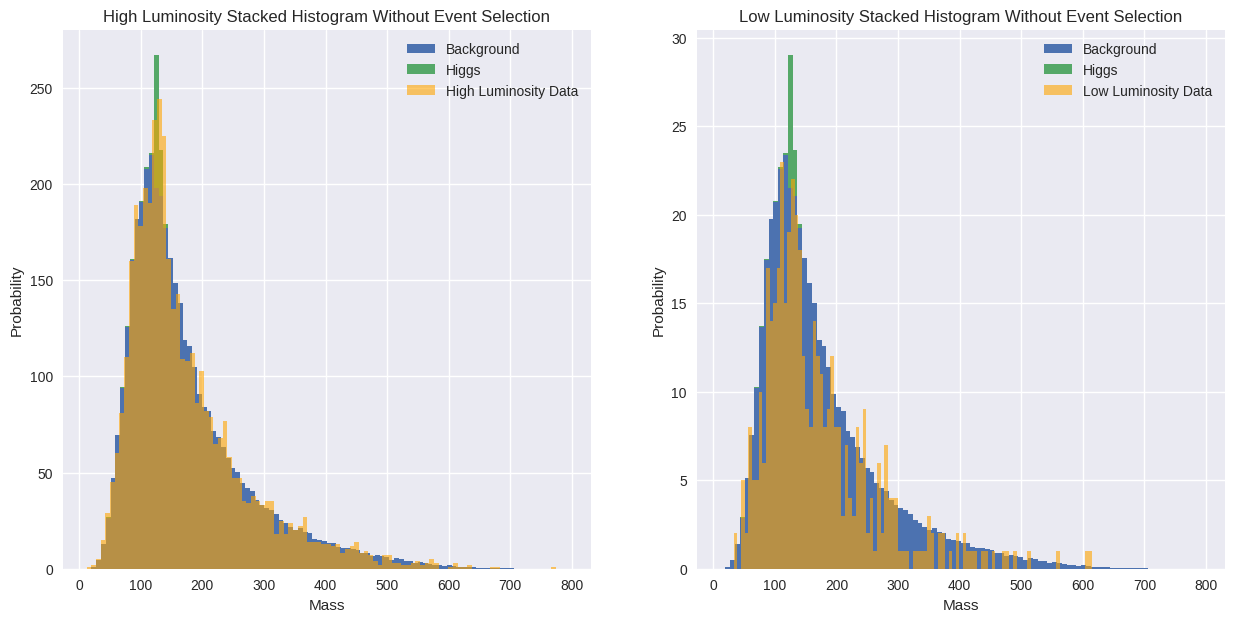

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

a = ax[0].hist([qcd['mass'], higgs['mass']], bins = 100, density = False, 
               stacked = True, weights = [qcd_weight_high, higgs_weight_high], label=["Background", "Higgs"])
ax[0].hist(high_lumi_dict['mass'], bins = 100, density = False, alpha = .6, color = "orange", label="High Luminosity Data")

ax[0].legend(loc=0)
ax[0].set_title("High Luminosity Stacked Histogram Without Event Selection")
ax[0].set_xlabel("Mass")
ax[0].set_ylabel("Probability")


b = ax[1].hist([qcd['mass'], higgs['mass']], bins = 100, density = False, 
               stacked = True, weights = [qcd_weight_low, higgs_weight_low], label=["Background", "Higgs"])
ax[1].hist(low_lumi_dict['mass'], bins = 100, density = False, alpha = .6, color = "orange", label="Low Luminosity Data")

ax[1].legend(loc=0)
ax[1].set_title("Low Luminosity Stacked Histogram Without Event Selection")
ax[1].set_xlabel("Mass")
ax[1].set_ylabel("Probability")

plt.show()

### High Luminosity

##### Examine at the cuts determined earlier

##### Mass: 124.56 to 132.60

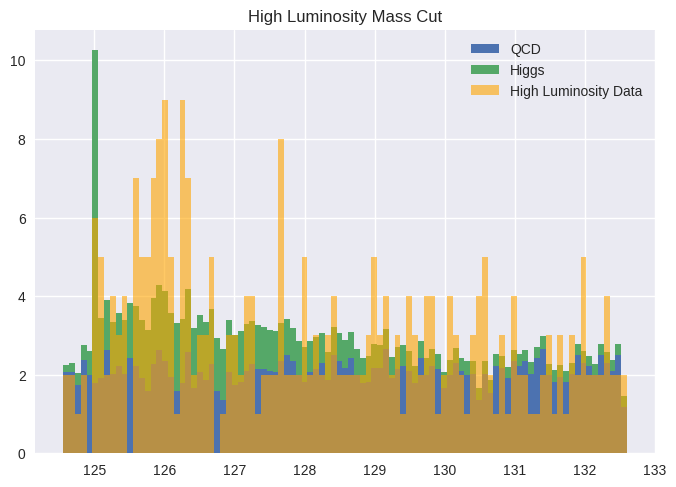

In [18]:
fig, ax = plt.subplots(1,1)

start = 124.56
stop = 132.60
optimal_bins = 97

ax.hist([qcd['mass'], higgs['mass']], bins = optimal_bins, density = False, stacked = True, 
            weights = [qcd_weight_high, higgs_weight_high], range = [start, stop], label=["QCD", "Higgs"])

ax.hist(high_lumi_dict['mass'], bins = optimal_bins, density = False, alpha = .6, 
        color = "orange", label="High Luminosity Data", range = [start, stop])

ax.set_title("High Luminosity Mass Cut")

ax.legend(loc=0)
plt.show()

Significance of pt high luminosity = 5.845
Significance of eta high luminosity = 5.845
Significance of phi high luminosity = 5.845
Significance of mass high luminosity = 5.845
Significance of ee2 high luminosity = 5.845
Significance of ee3 high luminosity = 5.845
Significance of d2 high luminosity = 5.845
Significance of angularity high luminosity = 5.845
Significance of t1 high luminosity = 5.845
Significance of t2 high luminosity = 5.845
Significance of t3 high luminosity = 5.845
Significance of t21 high luminosity = 5.845
Significance of t32 high luminosity = 5.845
Significance of KtDeltaR high luminosity = 5.845


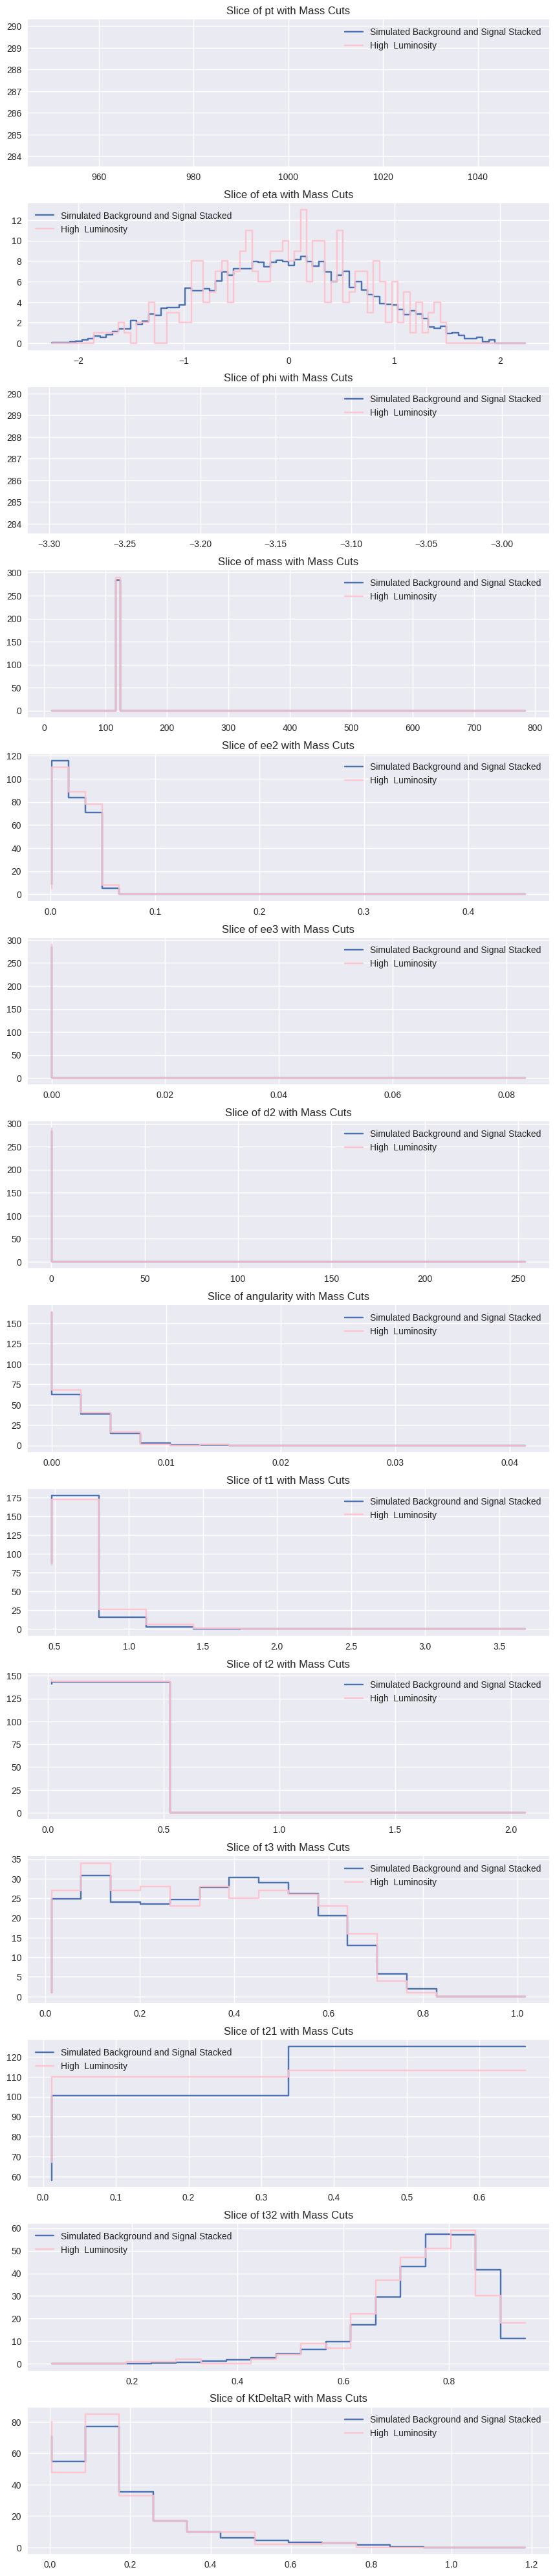

In [19]:
fig, ax = plt.subplots(1, 1)
plt.close()
fig2, ax2 = plt.subplots(len(keys), 1, figsize=(9,40))
fig2.tight_layout(pad=2)

i = 0
for key in keys:
    
    var = key

    mass_lower = qcd['mass'].min()
    mass_upper = qcd['mass'].max()

    var_lower = qcd[var].min()
    var_upper = qcd[var].max()

    mass_bins = 97
    mass_slice = 14
    var_bins = optimal_bin_num[i]

    hist_qcd = ax.hist2d(qcd['mass'], qcd[var], bins = [mass_bins, var_bins], 
                         range = [[mass_lower, mass_upper], [var_lower, var_upper]], density = False, weights = qcd_weight_high)
    hist_higgs = ax.hist2d(higgs['mass'], higgs[var], bins = [mass_bins, var_bins], 
                           range = [[mass_lower, mass_upper], [var_lower, var_upper]], density = False, weights = higgs_weight_high)
    hist_lumi = ax.hist2d(high_lumi_dict['mass'], high_lumi_dict[var], [mass_bins, var_bins], 
                          range = [[mass_lower, mass_upper], [var_lower, var_upper]], density = False)

    qcd_slice = hist_qcd[0][mass_slice]
    higgs_slice = hist_higgs[0][mass_slice]
    lumi_slice = hist_lumi[0][mass_slice]

    ax2[i].step(hist_qcd[2][0:var_bins], (qcd_slice + higgs_slice), alpha = 1, label = "Simulated Background and Signal Stacked")
    ax2[i].step(hist_lumi[2][0:var_bins], lumi_slice, color = 'pink', alpha = .9, label="High  Luminosity")
    ax2[i].set_title("Slice of "+str(var)+" with Mass Cuts")
    ax2[i].legend(loc=0)

    n_experiment = np.sum(lumi_slice)
    n_background = np.sum(qcd_slice)
    sig = stats.norm.ppf(stats.poisson.cdf(n_experiment, n_background, loc = 0))  # stats.poisson.cdf(k, mu, loc=0)
    print("Significance of "+str(var)+" high luminosity = " +str(round(sig,3)))
    
    i = i+1

### Low Luminosity

##### Examine at the cuts determined earlier

##### Mass: 124.56 to 132.60

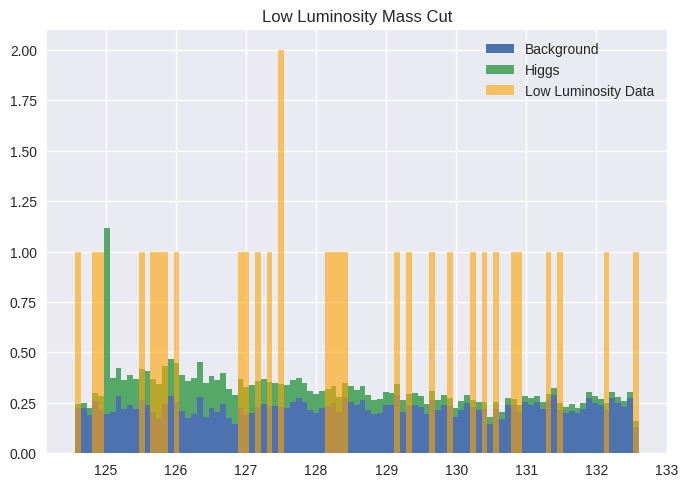

In [20]:
fig, ax = plt.subplots(1,1)

start = 124.56
stop = 132.60
optimal_bins = 97

ax.hist([qcd['mass'], higgs['mass']], bins = optimal_bins, density = False, stacked = True, 
            weights = [qcd_weight_low, higgs_weight_low], range = [start, stop], label=["Background", "Higgs"])

ax.hist(low_lumi_dict['mass'], bins = optimal_bins, density = False, alpha = .6, 
        color = "orange", label="Low Luminosity Data", range = [start, stop])

ax.set_title("Low Luminosity Mass Cut")

ax.legend(loc=0)
plt.show()

Significance of pt low luminosity = 1.942
Significance of eta low luminosity = 1.942
Significance of phi low luminosity = 1.942
Significance of mass low luminosity = 1.942
Significance of ee2 low luminosity = 1.942
Significance of ee3 low luminosity = 1.942
Significance of d2 low luminosity = 1.942
Significance of angularity low luminosity = 1.942
Significance of t1 low luminosity = 1.942
Significance of t2 low luminosity = 1.942
Significance of t3 low luminosity = 1.942
Significance of t21 low luminosity = 1.942
Significance of t32 low luminosity = 1.942
Significance of KtDeltaR low luminosity = 1.942


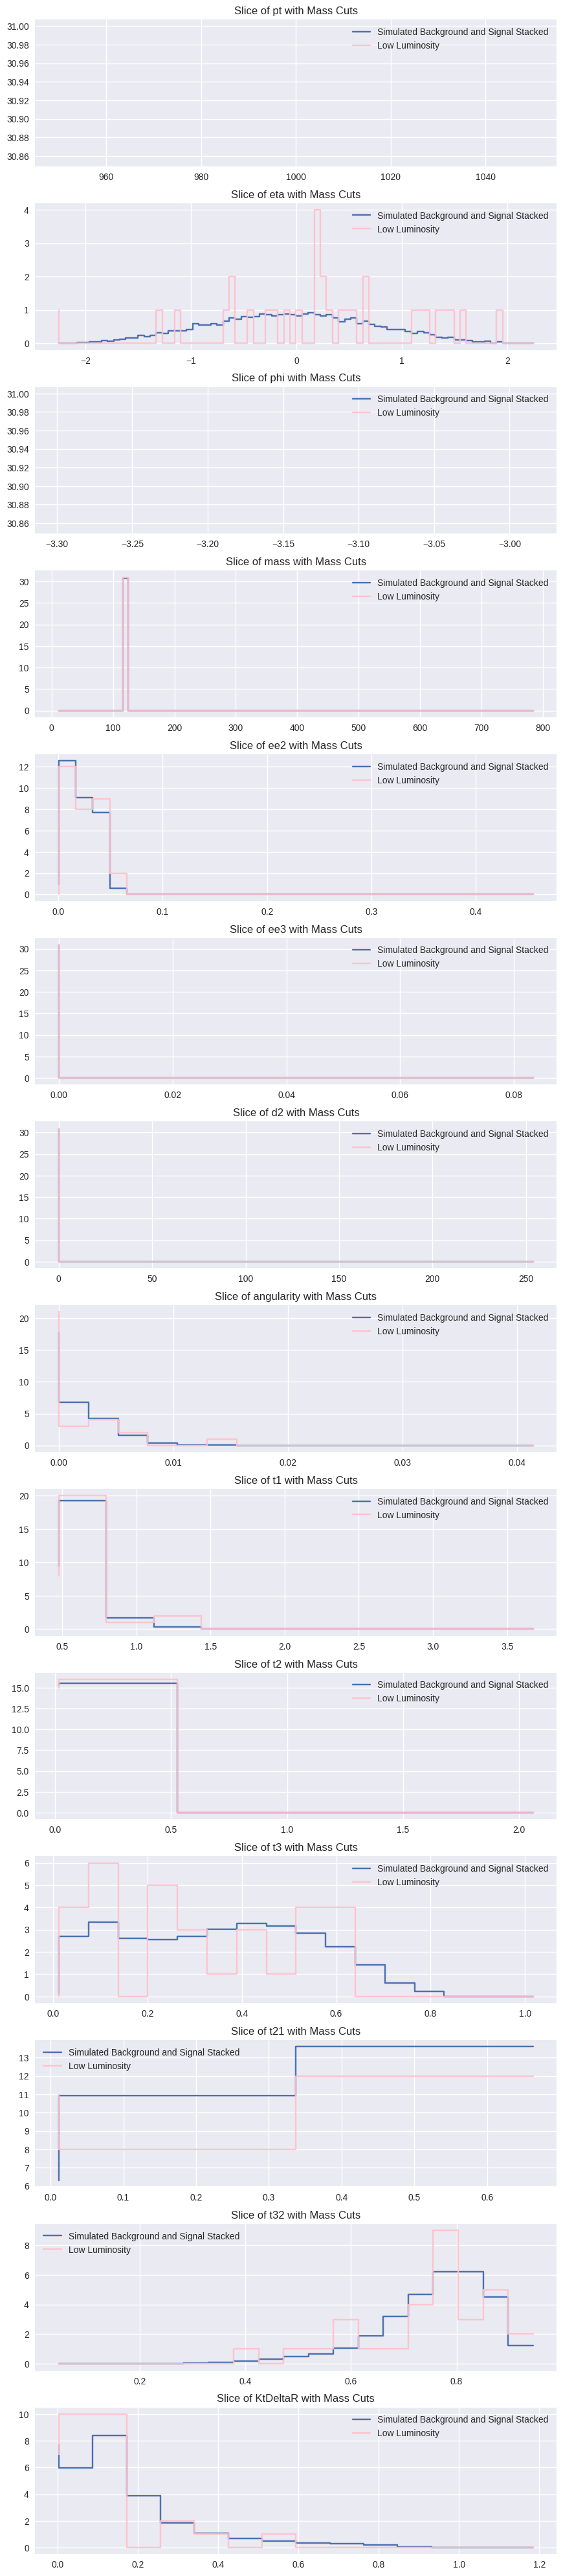

In [21]:
fig, ax = plt.subplots(1, 1)
plt.close()
fig2, ax2 = plt.subplots(len(keys), 1, figsize=(9,40))
fig2.tight_layout(pad = 2)

i = 0
for key in keys:
    
    var = key

    mass_lower = qcd['mass'].min()
    mass_upper = qcd['mass'].max()

    var_lower = qcd[var].min()
    var_upper = qcd[var].max()

    mass_bins = 97
    mass_slice = 14
    var_bins = optimal_bin_num[i]

    hist_qcd = ax.hist2d(qcd['mass'], qcd[var], bins = [mass_bins, var_bins], 
                         range = [[mass_lower, mass_upper], [var_lower, var_upper]], density = False, weights = qcd_weight_low)
    hist_higgs = ax.hist2d(higgs['mass'], higgs[var], bins = [mass_bins, var_bins], 
                           range = [[mass_lower, mass_upper], [var_lower, var_upper]], density = False, weights = higgs_weight_low)
    hist_lumi = ax.hist2d(low_lumi_dict['mass'], low_lumi_dict[var], [mass_bins, var_bins], 
                          range = [[mass_lower, mass_upper], [var_lower, var_upper]], density = False)

    qcd_slice = hist_qcd[0][mass_slice]
    higgs_slice = hist_higgs[0][mass_slice]
    lumi_slice = hist_lumi[0][mass_slice]

    ax2[i].step(hist_qcd[2][0:var_bins], (qcd_slice + higgs_slice), alpha = 1, label = "Simulated Background and Signal Stacked")
    ax2[i].step(hist_lumi[2][0:var_bins], lumi_slice, color = 'pink', alpha = .9, label = "Low Luminosity")
    ax2[i].set_title("Slice of "+str(var)+" with Mass Cuts")
    ax2[i].legend(loc=0)

    n_experiment = np.sum(lumi_slice)
    n_background = np.sum(qcd_slice)
    sig = stats.norm.ppf(stats.poisson.cdf(n_experiment, n_background, loc = 0))  # stats.poisson.cdf(k, mu, loc=0)
    print("Significance of "+str(var)+" low luminosity = " +str(round(sig,3)))
    
    i = i+1